# Goal

- Download google fonts
- Produce a dataset of individual characters for each font (grouped by character)

## Getting google fonts



In [1]:
![[ -f master.zip ]] || (echo "dowloading fonts" && wget -q https://github.com/google/fonts/archive/master.zip)
!ls -lth master.zip
![[ -d fonts-master ]] || (echo 'Unzipping' && unzip -q master.zip)
!ls -l fonts-master/ofl/ | head
# !ls -l fonts-master/apache/
# !ls -l fonts-master/ofl/
# !ls -l fonts-master/ufl/

dowloading fonts
-rw-r--r-- 1 root root 385M Apr 17 01:20 master.zip
Unzipping
total 4176
drwxr-xr-x 2 root root 4096 Apr 15 18:24 abeezee
drwxr-xr-x 2 root root 4096 Apr 15 18:24 abel
drwxr-xr-x 2 root root 4096 Apr 15 18:24 abhayalibre
drwxr-xr-x 2 root root 4096 Apr 15 18:24 abrilfatface
drwxr-xr-x 2 root root 4096 Apr 15 18:24 abyssinicasil
drwxr-xr-x 2 root root 4096 Apr 15 18:24 acme
drwxr-xr-x 2 root root 4096 Apr 15 18:24 actor
drwxr-xr-x 2 root root 4096 Apr 15 18:24 adamina
drwxr-xr-x 2 root root 4096 Apr 15 18:24 adobeblank


## Protobufs

- https://developers.google.com/protocol-buffers/docs/pythontutorial

### Standard Message Methods

Each message class also contains a number of other methods that let you check or manipulate the entire message, including:

-   `IsInitialized()`: checks if all the required fields have been set.
-   `__str__()`: returns a human-readable representation of the message, particularly useful for debugging. (Usually invoked as `str(message)` or `print message`.)
-   `CopyFrom(other_msg)`: overwrites the message with the given message's values.
-   `Clear()`: clears all the elements back to the empty state.

These methods implement the `Message` interface. For more information, see the [complete API documentation for `Message`](https://googleapis.dev/python/protobuf/latest/google/protobuf/message.html#google.protobuf.message.Message).

### Parsing and Serialization

Finally, each protocol buffer class has methods for writing and reading messages of your chosen type using the protocol buffer [binary format](https://developers.google.com/protocol-buffers/docs/encoding). These include:

-   `SerializeToString()`: serializes the message and returns it as a string. Note that the bytes are binary, not text; we only use the `str` type as a convenient container.
-   `ParseFromString(data)`: parses a message from the given string.

These are just a couple of the options provided for parsing and serialization. Again, see the [`Message` API reference](https://googleapis.dev/python/protobuf/latest/google/protobuf/message.html#google.protobuf.message.Message) for a complete list.

In [0]:
!wget -q https://raw.githubusercontent.com/googlefonts/fontbakery/master/Lib/fontbakery/fonts_public.proto
!wget -q https://raw.githubusercontent.com/googlefonts/fontbakery/master/Lib/fontbakery/fonts_public_pb2.py

In [0]:
def get_FamilyProto_Message(path):
  from fonts_public_pb2 import FamilyProto
  from google.protobuf import text_format
  message = FamilyProto()
  text_data = open(path, "rb").read()
  text_format.Merge(text_data, message)
  return message


In [4]:
!ls fonts-master/ofl/monda/

DESCRIPTION.en_us.html	METADATA.pb	Monda-Regular.ttf
FONTLOG.txt		Monda-Bold.ttf	OFL.txt


In [5]:
out = get_FamilyProto_Message('fonts-master/ofl/monda/METADATA.pb')
print(type(out))
print(out)

<class 'fonts_public_pb2.FamilyProto'>
name: "Monda"
designer: "Vernon Adams"
license: "OFL"
category: "SANS_SERIF"
date_added: "2012-11-30"
fonts {
  name: "Monda"
  style: "normal"
  weight: 400
  filename: "Monda-Regular.ttf"
  post_script_name: "Monda-Regular"
  full_name: "Monda Regular"
  copyright: "Copyright (c) 2012, vernon adams (vern@newtypography.co.uk), with Reserved Font Names \'Monda\'"
}
fonts {
  name: "Monda"
  style: "normal"
  weight: 700
  filename: "Monda-Bold.ttf"
  post_script_name: "Monda-Bold"
  full_name: "Monda Bold"
  copyright: "Copyright (c) 2012, vernon adams (vern@newtypography.co.uk), with Reserved Font Names \'Monda\'"
}
subsets: "menu"
subsets: "latin"
subsets: "latin-ext"



In [6]:
out.category

'SANS_SERIF'

In [7]:
out.fonts[0]

name: "Monda"
style: "normal"
weight: 400
filename: "Monda-Regular.ttf"
post_script_name: "Monda-Regular"
full_name: "Monda Regular"
copyright: "Copyright (c) 2012, vernon adams (vern@newtypography.co.uk), with Reserved Font Names \'Monda\'"

# Library Code






## TTF To Image

In [0]:
from PIL import ImageFont, ImageDraw, Image

def create_samples_for_font(ttf_abs_path,
                            charset,
                            font_size=20,
                            img_size=28,
                            start_x=4,
                            start_y=4):
  try:
    font = ImageFont.truetype(ttf_abs_path, font_size)
    for char in charset:
      img = Image.new("RGB", (img_size, img_size), "black")
      draw = ImageDraw.Draw(img)
      draw.text((start_x, start_y), char, font=font, fill='white')
      yield char, img   
  except Exception as e:
    print(f'skipping "{ttf_abs_path}": {e}')

## Listing and Processing Google Fonts


In [0]:
import os
import os.path as osp
from string import ascii_lowercase  # https://stackoverflow.com/questions/514448/python-loop-over-consecutive-characters


def list_typeface_dirs(limit=None):
  i = 0
  for license_type in ['ofl', 'ufl', 'apache']:
    base_path = osp.join('fonts-master', license_type)
    for typeface in os.listdir(base_path):
      typeface_path = os.path.join(base_path, typeface)
      yield typeface, typeface_path
      i += 1
      if limit and i > limit:
        return

# <class 'fonts_public_pb2.FamilyProto'>
# name: "Monda"
# designer: "Vernon Adams"
# license: "OFL"
# category: "SANS_SERIF"
# date_added: "2012-11-30"
# fonts {
#   name: "Monda"
#   style: "normal"
#   weight: 400
#   filename: "Monda-Regular.ttf"
#   post_script_name: "Monda-Regular"
#   full_name: "Monda Regular"
#   copyright: "Copyright (c) 2012, vernon adams (vern@newtypography.co.uk), with Reserved Font Names \'Monda\'"
# }
# fonts {
#   name: "Monda"
#   style: "normal"
#   weight: 700
#   filename: "Monda-Bold.ttf"
#   post_script_name: "Monda-Bold"
#   full_name: "Monda Bold"
#   copyright: "Copyright (c) 2012, vernon adams (vern@newtypography.co.uk), with Reserved Font Names \'Monda\'"
# }
# subsets: "menu"
# subsets: "latin"
# subsets: "latin-ext"

def list_font_families(categories=[], limit=None):
  i = 0
  for license_type in ['ofl', 'ufl', 'apache']:
    base_path = osp.join('fonts-master', license_type)
    for typeface in os.listdir(base_path):
      family_dir = os.path.join(base_path, typeface)

      font_family = get_FamilyProto_Message(osp.join(family_dir, 'METADATA.pb'))
      if categories and font_family.category not in categories:
        print(f'{font_family.category} not in {categories}')
        continue
      yield font_family, family_dir

      i += 1
      if limit and i > limit:
        return

def list_fonts(font_families, post_script_name_suffix=None):
  for font_family, family_dir in font_families:
    for font in font_family.fonts:
      if post_script_name_suffix and not font.post_script_name.endswith(post_script_name_suffix):
        print(f'not {font.post_script_name}.endswith({post_script_name_suffix})')
        continue
      yield font, font_family, family_dir


def gen_char_imgs(categories=[], post_script_name_suffix=None, limit=None):
  font_families = list_font_families(limit=limit, categories=categories)
  for font, font_family, family_dir in list_fonts(font_families, post_script_name_suffix=post_script_name_suffix):
    for char, img in create_samples_for_font(osp.join(family_dir, font.filename), ascii_lowercase):
      yield img, char, font, font_family, family_dir


def numpy_samples(categories=[], post_script_name_suffix=None, limit=None):
  all_arrs = []
  all_chars = []
  for img, char, font, font_family, family_dir in gen_char_imgs(categories=categories, post_script_name_suffix=post_script_name_suffix, limit=limit):
    arr = np.array(img.convert(mode='L'))
    all_arrs.append(arr)
    all_chars.append(np.uint8(ord(char)))
    print(arr.shape, len(all_arrs))
  images = np.stack(all_arrs).reshape((len(all_arrs), 28, 28, 1))
  labels = np.stack(all_chars)
  return images, labels


def png_samples(base_path, categories=[], post_script_name_suffix=None, limit=None, verbose=False):
  if not os.path.isdir(base_path):
      os.makedirs(base_path)
  for img, char, font, font_family, family_dir in gen_char_imgs(categories=categories, post_script_name_suffix=post_script_name_suffix, limit=limit):
      fname = f"{char}_{font_family.category}_{font_family.name}_{font.post_script_name}_{font.style}_{font.weight}.png"
      out_path = os.path.join(base_path, fname)
      img.save(out_path)
      print(f'saved {out_path}')


def list_pngs(base_path, suffix=None, limit=None):
  for i, fname in enumerate(os.listdir(base_path)):
    if suffix:
      if suffix not in fname:
        continue
    fpath = os.path.join(base_path, fname)
    char = fname.split('_')[0]
    img = Image.open(fpath)
    yield np.array(img.convert(mode='L')), char
    if limit and i > limit:
      return

#### Dataset Generation Sanity Checks

In [45]:
!rm -rf ./samples/

png_samples('./samples', categories='SANS_SERIF', limit=2, verbose=True)

HANDWRITING not in SANS_SERIF
saved ./samples/a_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/b_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/c_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/d_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/e_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/f_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/g_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/h_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/i_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/j_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/k_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/l_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/m_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/n_SANS_SERIF_Armata_Armata-Regular_normal_400.png
saved ./samples/o_SANS_SERIF_Armata_Armata-Reg

In [46]:
png_samples('./samples', categories='SANS_SERIF', post_script_name_suffix='Italic', limit=2)

HANDWRITING not in SANS_SERIF
not Armata-Regular.endswith(Italic)
HANDWRITING not in SANS_SERIF
not Rambla-Regular.endswith(Italic)
saved ./samples/a_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/b_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/c_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/d_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/e_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/f_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/g_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/h_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/i_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/j_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/k_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/l_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/m_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
saved ./samples/n_SANS_

In [47]:
import numpy as np

all_arrs = []
all_chars = []
for arr, char in list_pngs('./samples'):
  all_arrs.append(arr)
  all_chars.append(np.uint8(ord(char)))
images = np.stack(all_arrs).reshape((len(all_arrs), 28, 28, 1))
labels = np.stack(all_chars)
print(images.shape, labels.shape)

!ls samples/ | head

(286, 28, 28, 1) (286,)
a_SANS_SERIF_Armata_Armata-Regular_normal_400.png
a_SANS_SERIF_Rambla_Rambla-BoldItalic_italic_700.png
a_SANS_SERIF_Rambla_Rambla-Bold_normal_700.png
a_SANS_SERIF_Rambla_Rambla-Italic_italic_400.png
a_SANS_SERIF_Rambla_Rambla-Regular_normal_400.png
a_SERIF_Ibarra Real Nova_IbarraRealNova-BoldItalic_italic_700.png
a_SERIF_Ibarra Real Nova_IbarraRealNova-Bold_normal_700.png
a_SERIF_Ibarra Real Nova_IbarraRealNova-Italic_italic_400.png
a_SERIF_Ibarra Real Nova_IbarraRealNova-Regular_normal_400.png
a_SERIF_Ibarra Real Nova_IbarraRealNova-SemiBoldItalic_italic_600.png


### visualization

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def numpy_arrays_to_canvas(input_arr, dim=20):
  canvas = np.zeros((28*dim, 28*dim))
  for i in range(dim):
      for j in range(dim):
          image_idx = (i * dim) + j
          if image_idx < len(input_arr):
            canvas[i*28:(i+1)*28, j*28:(j+1)*28] = input_arr[image_idx].reshape(28, 28)
  return canvas

def plot_canvas(input_arr, dim=20):
  plt.figure(figsize=(8, 10))
  # Xi, Yi = np.meshgrid(x_values, y_values)
  canvas = numpy_arrays_to_canvas(input_arr, dim=dim)
  plt.imshow(canvas, origin="upper", cmap="gray")
  plt.tight_layout()

HANDWRITING not in SANS_SERIF
not Armata-Regular.endswith(Italic)
HANDWRITING not in SANS_SERIF
not Rambla-Regular.endswith(Italic)
(28, 28) 1
(28, 28) 2
(28, 28) 3
(28, 28) 4
(28, 28) 5
(28, 28) 6
(28, 28) 7
(28, 28) 8
(28, 28) 9
(28, 28) 10
(28, 28) 11
(28, 28) 12
(28, 28) 13
(28, 28) 14
(28, 28) 15
(28, 28) 16
(28, 28) 17
(28, 28) 18
(28, 28) 19
(28, 28) 20
(28, 28) 21
(28, 28) 22
(28, 28) 23
(28, 28) 24
(28, 28) 25
(28, 28) 26
not Rambla-Bold.endswith(Italic)
(28, 28) 27
(28, 28) 28
(28, 28) 29
(28, 28) 30
(28, 28) 31
(28, 28) 32
(28, 28) 33
(28, 28) 34
(28, 28) 35
(28, 28) 36
(28, 28) 37
(28, 28) 38
(28, 28) 39
(28, 28) 40
(28, 28) 41
(28, 28) 42
(28, 28) 43
(28, 28) 44
(28, 28) 45
(28, 28) 46
(28, 28) 47
(28, 28) 48
(28, 28) 49
(28, 28) 50
(28, 28) 51
(28, 28) 52
HANDWRITING not in SANS_SERIF
HANDWRITING not in SANS_SERIF
DISPLAY not in SANS_SERIF
HANDWRITING not in SANS_SERIF
not IbarraRealNova-Regular.endswith(Italic)
(28, 28) 53
(28, 28) 54
(28, 28) 55
(28, 28) 56
(28, 28) 57


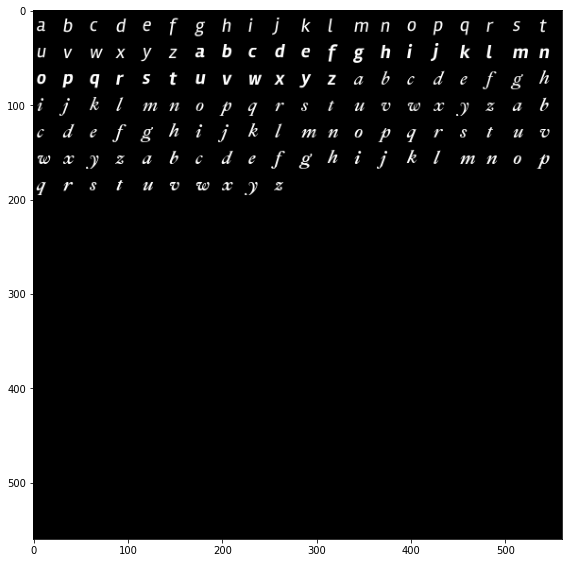

In [51]:
images, _ = numpy_samples(categories='SANS_SERIF', post_script_name_suffix='Italic', limit=2)
plot_canvas(images)

HANDWRITING not in SANS_SERIF
(28, 28) 1
(28, 28) 2
(28, 28) 3
(28, 28) 4
(28, 28) 5
(28, 28) 6
(28, 28) 7
(28, 28) 8
(28, 28) 9
(28, 28) 10
(28, 28) 11
(28, 28) 12
(28, 28) 13
(28, 28) 14
(28, 28) 15
(28, 28) 16
(28, 28) 17
(28, 28) 18
(28, 28) 19
(28, 28) 20
(28, 28) 21
(28, 28) 22
(28, 28) 23
(28, 28) 24
(28, 28) 25
(28, 28) 26
HANDWRITING not in SANS_SERIF
(28, 28) 27
(28, 28) 28
(28, 28) 29
(28, 28) 30
(28, 28) 31
(28, 28) 32
(28, 28) 33
(28, 28) 34
(28, 28) 35
(28, 28) 36
(28, 28) 37
(28, 28) 38
(28, 28) 39
(28, 28) 40
(28, 28) 41
(28, 28) 42
(28, 28) 43
(28, 28) 44
(28, 28) 45
(28, 28) 46
(28, 28) 47
(28, 28) 48
(28, 28) 49
(28, 28) 50
(28, 28) 51
(28, 28) 52
(28, 28) 53
(28, 28) 54
(28, 28) 55
(28, 28) 56
(28, 28) 57
(28, 28) 58
(28, 28) 59
(28, 28) 60
(28, 28) 61
(28, 28) 62
(28, 28) 63
(28, 28) 64
(28, 28) 65
(28, 28) 66
(28, 28) 67
(28, 28) 68
(28, 28) 69
(28, 28) 70
(28, 28) 71
(28, 28) 72
(28, 28) 73
(28, 28) 74
(28, 28) 75
(28, 28) 76
(28, 28) 77
(28, 28) 78
(28, 28) 79
(

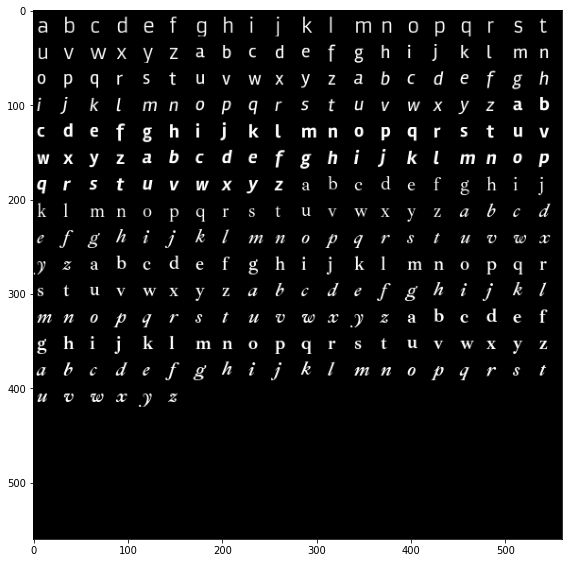

In [50]:
images, _ = numpy_samples(categories='SANS_SERIF', limit=2)
plot_canvas(images)

here's one way to show plots of a bunch of diff fonts quickly.

Potential improvements:
- [ ] title the plot rather than print typeface name
- [ ] extract a function to quickly produce a set of arrays for a typeface (is it easier to parameterize that by `typeface_name` or `ttf_abs_path`? If I were *generating* the images, I would only need `ttf_abs_path`

HANDWRITING not in SANS_SERIF
not Armata-Regular.endswith(Italic)
HANDWRITING not in SANS_SERIF
not Rambla-Regular.endswith(Italic)
(28, 28) 1
(28, 28) 2
(28, 28) 3
(28, 28) 4
(28, 28) 5
(28, 28) 6
(28, 28) 7
(28, 28) 8
(28, 28) 9
(28, 28) 10
(28, 28) 11
(28, 28) 12
(28, 28) 13
(28, 28) 14
(28, 28) 15
(28, 28) 16
(28, 28) 17
(28, 28) 18
(28, 28) 19
(28, 28) 20
(28, 28) 21
(28, 28) 22
(28, 28) 23
(28, 28) 24
(28, 28) 25
(28, 28) 26
not Rambla-Bold.endswith(Italic)
(28, 28) 27
(28, 28) 28
(28, 28) 29
(28, 28) 30
(28, 28) 31
(28, 28) 32
(28, 28) 33
(28, 28) 34
(28, 28) 35
(28, 28) 36
(28, 28) 37
(28, 28) 38
(28, 28) 39
(28, 28) 40
(28, 28) 41
(28, 28) 42
(28, 28) 43
(28, 28) 44
(28, 28) 45
(28, 28) 46
(28, 28) 47
(28, 28) 48
(28, 28) 49
(28, 28) 50
(28, 28) 51
(28, 28) 52
HANDWRITING not in SANS_SERIF
HANDWRITING not in SANS_SERIF
DISPLAY not in SANS_SERIF
HANDWRITING not in SANS_SERIF
not IbarraRealNova-Regular.endswith(Italic)
(28, 28) 53
(28, 28) 54
(28, 28) 55
(28, 28) 56
(28, 28) 57


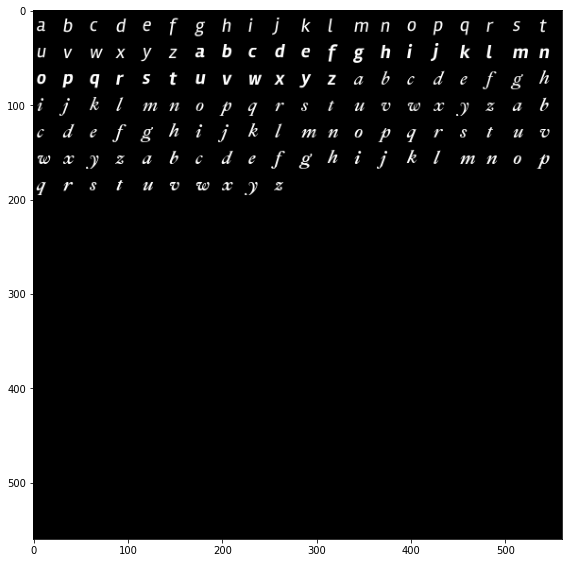

In [43]:
# def plot_samples(categories=[], post_script_name_suffix=None, limit=None):
#   all_arrs = []
#   all_chars = []
#   for img, char, font, font_family, family_dir in gen_char_imgs(categories=categories, post_script_name_suffix=post_script_name_suffix, limit=limit):
#     arr = np.array(img.convert(mode='L'))
#     all_arrs.append(arr)
#     all_chars.append(np.uint8(ord(char)))
#     print(arr.shape, len(all_arrs))
#   images = np.stack(all_arrs).reshape((len(all_arrs), 28, 28, 1))
#   chars = np.stack(all_chars)
#   plot_canvas(images)

# plot_samples(categories='SANS_SERIF', post_script_name_suffix='Italic', limit=2)  

#### sanity checks..

### Dataset Wrapper

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

# Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import gzip
import os

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin

from tensorflow.python.framework import dtypes
from tensorflow.python.framework import random_seed
from tensorflow.python.platform import gfile
from tensorflow.python.util.deprecation import deprecated

_Datasets = collections.namedtuple('_Datasets', ['train', 'validation', 'test'])


@deprecated(None, 'Please use tf.one_hot on tensors.')
def _dense_to_one_hot(labels_dense, num_classes):
  """Convert class labels from scalars to one-hot vectors."""
  num_labels = labels_dense.shape[0]
  index_offset = numpy.arange(num_labels) * num_classes
  labels_one_hot = numpy.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot


class _DataSet(object):
  @deprecated(None, 'Please use alternatives such as official/mnist/_DataSet.py'
              ' from tensorflow/models.')
  def __init__(self,
               images,
               labels,
               fake_data=False,
               one_hot=False,
               dtype=dtypes.uint8,
               reshape=True,
               seed=None):
    """Construct a _DataSet.

    one_hot arg is used only if fake_data is true.  `dtype` can be either
    `uint8` to leave the input as `[0, 255]`, or `float32` to rescale into
    `[0, 1]`.  Seed arg provides for convenient deterministic testing.

    Args:
      images: The images
      labels: The labels
      fake_data: Ignore inages and labels, use fake data.
      one_hot: Bool, return the labels as one hot vectors (if True) or ints (if
        False).
      dtype: Output image dtype. One of [uint8, float32]. `uint8` output has
        range [0,255]. float32 output has range [0,1].
      reshape: Bool. If True returned images are returned flattened to vectors.
      seed: The random seed to use.
    """
    seed1, seed2 = random_seed.get_seed(seed)
    # If op level seed is not set, use whatever graph level seed is returned
    numpy.random.seed(seed1 if seed is None else seed2)
    dtype = dtypes.as_dtype(dtype).base_dtype
    if dtype not in (dtypes.uint8, dtypes.float32):
      raise TypeError('Invalid image dtype %r, expected uint8 or float32' %
                      dtype)
    if fake_data:
      self._num_examples = 10000
      self.one_hot = one_hot
    else:
      assert images.shape[0] == labels.shape[0], (
          'images.shape: %s labels.shape: %s' % (images.shape, labels.shape))
      self._num_examples = images.shape[0]

      # Convert shape from [num examples, rows, columns, depth]
      # to [num examples, rows*columns] (assuming depth == 1)
      if reshape:
        assert images.shape[3] == 1
        images = images.reshape(images.shape[0],
                                images.shape[1] * images.shape[2])
      if dtype == dtypes.float32:
        # Convert from [0, 255] -> [0.0, 1.0].
        images = images.astype(numpy.float32)
        images = numpy.multiply(images, 1.0 / 255.0)
    self._images = images
    self._labels = labels
    self._epochs_completed = 0
    self._index_in_epoch = 0

  @property
  def images(self):
    return self._images

  @property
  def labels(self):
    return self._labels

  @property
  def num_examples(self):
    return self._num_examples

  @property
  def epochs_completed(self):
    return self._epochs_completed

  def next_batch(self, batch_size, fake_data=False, shuffle=True):
    """Return the next `batch_size` examples from this data set."""
    if fake_data:
      fake_image = [1] * 784
      if self.one_hot:
        fake_label = [1] + [0] * 9
      else:
        fake_label = 0
      return [fake_image for _ in xrange(batch_size)
             ], [fake_label for _ in xrange(batch_size)]
    start = self._index_in_epoch
    # Shuffle for the first epoch
    if self._epochs_completed == 0 and start == 0 and shuffle:
      perm0 = numpy.arange(self._num_examples)
      numpy.random.shuffle(perm0)
      self._images = self.images[perm0]
      self._labels = self.labels[perm0]
    # Go to the next epoch
    if start + batch_size > self._num_examples:
      # Finished epoch
      self._epochs_completed += 1
      # Get the rest examples in this epoch
      rest_num_examples = self._num_examples - start
      images_rest_part = self._images[start:self._num_examples]
      labels_rest_part = self._labels[start:self._num_examples]
      # Shuffle the data
      if shuffle:
        perm = numpy.arange(self._num_examples)
        numpy.random.shuffle(perm)
        self._images = self.images[perm]
        self._labels = self.labels[perm]
      # Start next epoch
      start = 0
      self._index_in_epoch = batch_size - rest_num_examples
      end = self._index_in_epoch
      images_new_part = self._images[start:end]
      labels_new_part = self._labels[start:end]
      return numpy.concatenate((images_rest_part, images_new_part),
                               axis=0), numpy.concatenate(
                                   (labels_rest_part, labels_new_part), axis=0)
    else:
      self._index_in_epoch += batch_size
      end = self._index_in_epoch
      return self._images[start:end], self._labels[start:end]

### Populate Dataset


Using a customized version of `read_data_sets` (from the MNIST `input_data.py`)

Adapted to list out characters from the generated directory.

In [0]:
def read_data_sets(train_dir,
                   fake_data=False,
                   one_hot=False,
                   dtype=dtypes.float32,
                   reshape=True,
                   validation_size=100,
                   seed=None):
  if fake_data:
    def fake():
      return _DataSet([], [],
                      fake_data=True,
                      one_hot=one_hot,
                      dtype=dtype,
                      seed=seed)

    train = fake()
    validation = fake()
    test = fake()
    return _Datasets(train=train, validation=validation, test=test)

  all_arrs = []
  all_chars = []
  for arr, char in list_images(train_dir):
    all_arrs.append(arr)
    all_chars.append(np.uint8(ord(char)))

  train_images = np.stack(all_arrs).reshape((len(all_arrs), 28, 28, 1))
  train_labels = np.stack(all_chars)
  print(train_images.shape, train_labels.shape)

  if not 0 <= validation_size <= len(train_images):
    raise ValueError(
        'Validation size should be between 0 and {}. Received: {}.'.format(
            len(train_images), validation_size))

  validation_images = train_images[:validation_size]
  validation_labels = train_labels[:validation_size]
  train_images = train_images[validation_size:]
  train_labels = train_labels[validation_size:]

  options = dict(dtype=dtype, reshape=reshape, seed=seed)

  train = _DataSet(train_images, train_labels, **options)
  validation = _DataSet(validation_images, validation_labels, **options)
  # test = _DataSet(test_images, test_labels, **options)

  return _Datasets(train=train, validation=validation, test=None)

# Full Dataset Generation

## `fonts24k`

(468, 28, 28, 1) (468,)
n_samples = 368, fonts24k.train.images[0].shape = (784,)


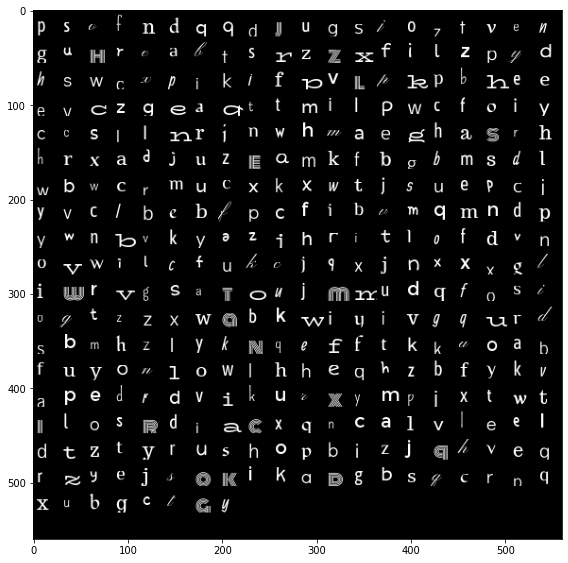

In [0]:
!rm -rf ./samples/

create_samples('./samples', limit=20)

fonts24k = read_data_sets('./samples')
n_samples = fonts24k.train.num_examples

print(f'n_samples = {n_samples}, fonts24k.train.images[0].shape = {fonts24k.train.images[0].shape}')

plot_canvas(fonts24k.train.images)

## sanity checks

tuffy (26, 28, 28, 1)
gothica1 (26, 28, 28, 1)
singleday (26, 28, 28, 1)
jaldi (26, 28, 28, 1)


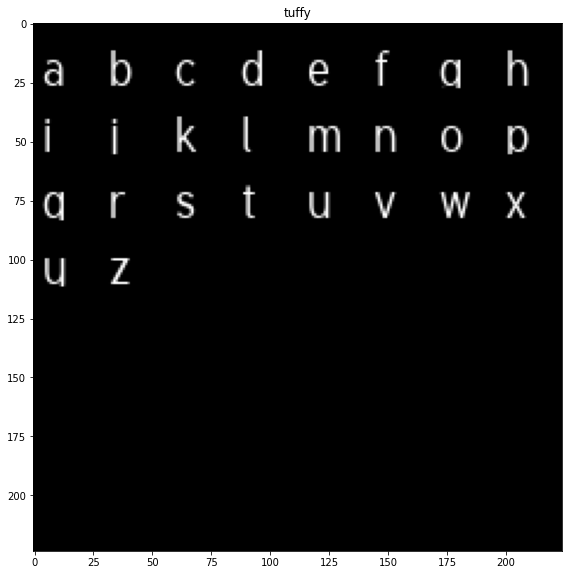

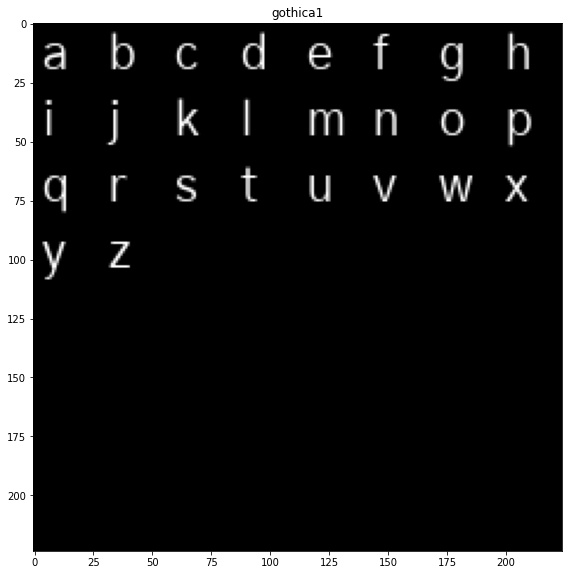

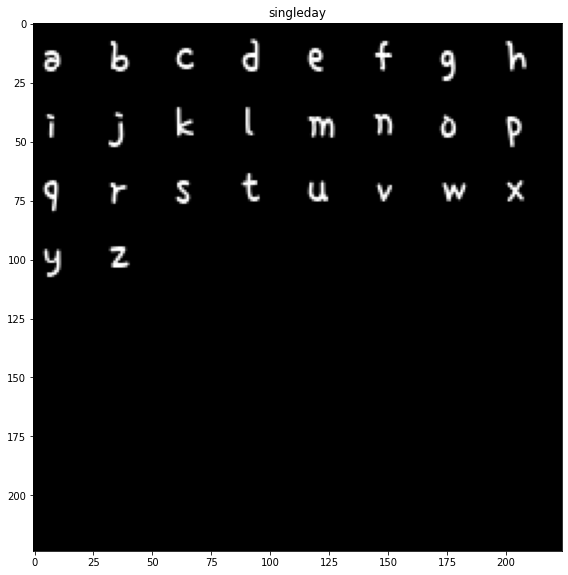

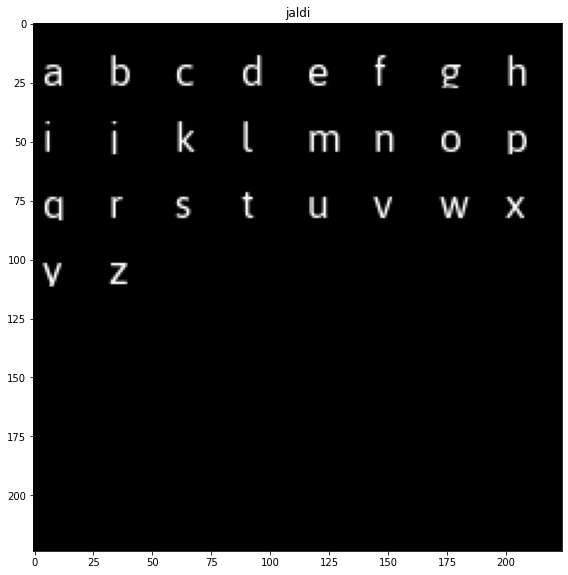

# Training

## Model definition

In [0]:
def xavier_init(fan_in, fan_out, constant=1): 
    """ Xavier initialization of network weights"""
    # https://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
    low = -constant*np.sqrt(6.0/(fan_in + fan_out)) 
    high = constant*np.sqrt(6.0/(fan_in + fan_out))
    return tf.random_uniform((fan_in, fan_out), 
                             minval=low, maxval=high, 
                             dtype=tf.float32)

class VariationalAutoencoder(object):
    """ Variation Autoencoder (VAE) with an sklearn-like interface implemented using TensorFlow.
    
    This implementation uses probabilistic encoders and decoders using Gaussian 
    distributions and  realized by multi-layer perceptrons. The VAE can be learned
    end-to-end.
    
    See "Auto-Encoding Variational Bayes" by Kingma and Welling for more details.
    """
    def __init__(self, network_architecture, transfer_fct=tf.nn.softplus, 
                 learning_rate=0.001, batch_size=100):
        self.network_architecture = network_architecture
        self.transfer_fct = transfer_fct
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        # tf Graph input
        self.x = tf.placeholder(tf.float32, [None, network_architecture["n_input"]])
        
        # Create autoencoder network
        self._create_network()
        # Define loss function based variational upper-bound and 
        # corresponding optimizer
        self._create_loss_optimizer()
        
        # Initializing the tensor flow variables
        init = tf.global_variables_initializer()

        # Launch the session
        self.sess = tf.InteractiveSession()
        self.sess.run(init)
    
    def _create_network(self):
        # Initialize autoencode network weights and biases
        network_weights = self._initialize_weights(**self.network_architecture)

        # Use recognition network to determine mean and 
        # (log) variance of Gaussian distribution in latent
        # space
        self.z_mean, self.z_log_sigma_sq = \
            self._recognition_network(network_weights["weights_recog"], 
                                      network_weights["biases_recog"])

        # Draw one sample z from Gaussian distribution
        n_z = self.network_architecture["n_z"]
        eps = tf.random_normal((self.batch_size, n_z), 0, 1, 
                               dtype=tf.float32)
        # z = mu + sigma*epsilon
        self.z = tf.add(self.z_mean, 
                        tf.multiply(tf.sqrt(tf.exp(self.z_log_sigma_sq)), eps))

        # Use generator to determine mean of
        # Bernoulli distribution of reconstructed input
        self.x_reconstr_mean = \
            self._generator_network(network_weights["weights_gener"],
                                    network_weights["biases_gener"])
            
    def _initialize_weights(self, n_hidden_recog_1, n_hidden_recog_2, 
                            n_hidden_gener_1,  n_hidden_gener_2, 
                            n_input, n_z):
        all_weights = dict()
        all_weights['weights_recog'] = {
            'h1': tf.Variable(xavier_init(n_input, n_hidden_recog_1)),
            'h2': tf.Variable(xavier_init(n_hidden_recog_1, n_hidden_recog_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_recog_2, n_z)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_recog_2, n_z))}
        all_weights['biases_recog'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_recog_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_recog_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_z], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_z], dtype=tf.float32))}
        all_weights['weights_gener'] = {
            'h1': tf.Variable(xavier_init(n_z, n_hidden_gener_1)),
            'h2': tf.Variable(xavier_init(n_hidden_gener_1, n_hidden_gener_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_gener_2, n_input)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_gener_2, n_input))}
        all_weights['biases_gener'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_gener_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_gener_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_input], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_input], dtype=tf.float32))}
        return all_weights
            
    def _recognition_network(self, weights, biases):
        # Generate probabilistic encoder (recognition network), which
        # maps inputs onto a normal distribution in latent space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.x, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        z_mean = tf.add(tf.matmul(layer_2, weights['out_mean']),
                        biases['out_mean'])
        z_log_sigma_sq = \
            tf.add(tf.matmul(layer_2, weights['out_log_sigma']), 
                   biases['out_log_sigma'])
        return (z_mean, z_log_sigma_sq)

    def _generator_network(self, weights, biases):
        # Generate probabilistic decoder (decoder network), which
        # maps points in latent space onto a Bernoulli distribution in data space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.z, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        x_reconstr_mean = \
            tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['out_mean']), 
                                 biases['out_mean']))
        return x_reconstr_mean
            
    def _create_loss_optimizer(self):
        # The loss is composed of two terms:
        # 1.) The reconstruction loss (the negative log probability
        #     of the input under the reconstructed Bernoulli distribution 
        #     induced by the decoder in the data space).
        #     This can be interpreted as the number of "nats" required
        #     for reconstructing the input when the activation in latent
        #     is given.
        # Adding 1e-10 to avoid evaluation of log(0.0)
        reconstr_loss = \
            -tf.reduce_sum(self.x * tf.log(1e-10 + self.x_reconstr_mean)
                           + (1-self.x) * tf.log(1e-10 + 1 - self.x_reconstr_mean),
                           1)
        # 2.) The latent loss, which is defined as the Kullback Leibler divergence 
        ##    between the distribution in latent space induced by the encoder on 
        #     the data and some prior. This acts as a kind of regularizer.
        #     This can be interpreted as the number of "nats" required
        #     for transmitting the the latent space distribution given
        #     the prior.
        latent_loss = -0.5 * tf.reduce_sum(1 + self.z_log_sigma_sq 
                                           - tf.square(self.z_mean) 
                                           - tf.exp(self.z_log_sigma_sq), 1)
        self.cost = tf.reduce_mean(reconstr_loss + latent_loss)   # average over batch
        # Use ADAM optimizer
        self.optimizer = \
            tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)
        
    def partial_fit(self, X):
        """Train model based on mini-batch of input data.
        
        Return cost of mini-batch.
        """
        opt, cost = self.sess.run((self.optimizer, self.cost), 
                                  feed_dict={self.x: X})
        return cost
    
    def transform(self, X):
        """Transform data by mapping it into the latent space."""
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.z_mean, feed_dict={self.x: X})
    
    def generate(self, z_mu=None):
        """ Generate data by sampling from latent space.
        
        If z_mu is not None, data for this point in latent space is
        generated. Otherwise, z_mu is drawn from prior in latent 
        space.        
        """
        if z_mu is None:
            z_mu = np.random.normal(size=self.network_architecture["n_z"])
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.z: z_mu})
    
    def reconstruct(self, X):
        """ Use VAE to reconstruct given data. """
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.x: X})

## Training Loop definition

In [0]:
def train(dataset, network_architecture, learning_rate=0.0001,
          batch_size=100, training_epochs=10, display_step=5):
    vae = VariationalAutoencoder(network_architecture, 
                                 learning_rate=learning_rate, 
                                 batch_size=batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(n_samples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, _ = dataset.train.next_batch(batch_size)

            # Fit training using batch data
            cost = vae.partial_fit(batch_xs)
            # Compute average loss
            avg_cost += cost / n_samples * batch_size

        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(avg_cost))
    return vae

In [0]:
network_architecture = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=20)  # dimensionality of latent space

vae = train(fonts24k, network_architecture, training_epochs=75)

Epoch: 0001 cost= 155.823980233
Epoch: 0006 cost= 91.570667268
Epoch: 0011 cost= 82.900912240
Epoch: 0016 cost= 77.806602833
Epoch: 0021 cost= 74.791204065
Epoch: 0026 cost= 72.460445868
Epoch: 0031 cost= 70.762768774
Epoch: 0036 cost= 69.259956541
Epoch: 0041 cost= 68.211426787
Epoch: 0046 cost= 67.347213517
Epoch: 0051 cost= 66.604296142
Epoch: 0056 cost= 65.748413307
Epoch: 0061 cost= 65.266490366
Epoch: 0066 cost= 64.724073100
Epoch: 0071 cost= 64.360574473


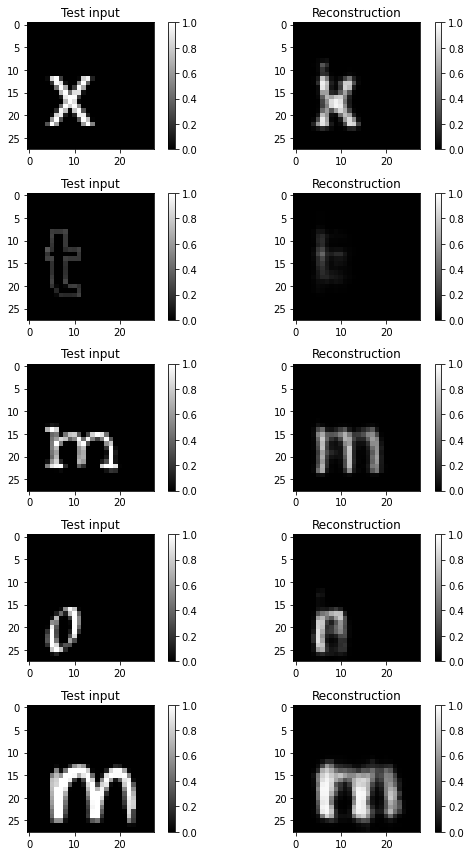

In [0]:
x_sample = fonts24k.validation.next_batch(100)[0]
x_reconstruct = vae.reconstruct(x_sample)

plt.figure(figsize=(8, 12))
for i in range(5):

    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(x_sample[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(x_reconstruct[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
plt.tight_layout()

/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 cost= 159.658228229
Epoch: 0006 cost= 93.723392612
Epoch: 0011 cost= 88.294210243
Epoch: 0016 cost= 87.640033890
Epoch: 0021 cost= 86.080460816
Epoch: 0026 cost= 85.482866031
Epoch: 0031 cost= 84.988145243
Epoch: 0036 cost= 84.228257298
Epoch: 0041 cost= 83.786441475
Epoch: 0046 cost= 82.833358631
Epoch: 0051 cost= 82.388836863
Epoch: 0056 cost= 82.626268800
Epoch: 0061 cost= 81.920527536
Epoch: 0066 cost= 81.975875459
Epoch: 0071 cost= 82.082115122


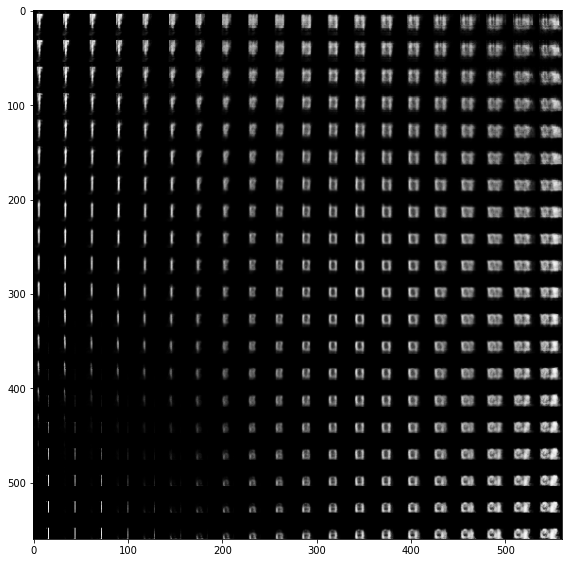

In [0]:
network_architecture_2d = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=2)  # dimensionality of latent space

vae_2d = train(fonts24k, network_architecture_2d, training_epochs=75)

nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)

canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mu = np.array([[xi, yi]]*vae.batch_size)
        x_mean = vae_2d.generate(z_mu)
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)

plt.figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
plt.imshow(canvas, origin="upper", cmap="gray")
plt.tight_layout()

## https://github.com/FelixMohr/Deep-learning-with-Python/blob/master/VAE.ipynb

In [0]:
tf.reset_default_graph()

batch_size = 64

X_in = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='X')
Y    = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='Y')
Y_flat = tf.reshape(Y, shape=[-1, 28 * 28])
keep_prob = tf.placeholder(dtype=tf.float32, shape=(), name='keep_prob')

dec_in_channels = 1
n_latent = 8

reshaped_dim = [-1, 7, 7, dec_in_channels]
inputs_decoder = 49 * dec_in_channels / 2


def lrelu(x, alpha=0.3):
    return tf.maximum(x, tf.multiply(x, alpha))

In [0]:
def encoder(X_in, keep_prob):
    activation = lrelu
    with tf.variable_scope("encoder", reuse=None):
        X = tf.reshape(X_in, shape=[-1, 28, 28, 1])
        x = tf.layers.conv2d(X, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=1, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.contrib.layers.flatten(x)
        mn = tf.layers.dense(x, units=n_latent)
        sd       = 0.5 * tf.layers.dense(x, units=n_latent)            
        epsilon = tf.random_normal(tf.stack([tf.shape(x)[0], n_latent])) 
        z  = mn + tf.multiply(epsilon, tf.exp(sd))
        
        return z, mn, sd

In [0]:
def decoder(sampled_z, keep_prob):
    with tf.variable_scope("decoder", reuse=None):
        x = tf.layers.dense(sampled_z, units=inputs_decoder, activation=lrelu)
        x = tf.layers.dense(x, units=inputs_decoder * 2 + 1, activation=lrelu)
        x = tf.reshape(x, reshaped_dim)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=2, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        
        x = tf.contrib.layers.flatten(x)
        x = tf.layers.dense(x, units=28*28, activation=tf.nn.sigmoid)
        img = tf.reshape(x, shape=[-1, 28, 28])
        return img

In [0]:
sampled, mn, sd = encoder(X_in, keep_prob)
dec = decoder(sampled, keep_prob)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


In [0]:
unreshaped = tf.reshape(dec, [-1, 28*28])
img_loss = tf.reduce_sum(tf.squared_difference(unreshaped, Y_flat), 1)
latent_loss = -0.5 * tf.reduce_sum(1.0 + 2.0 * sd - tf.square(mn) - tf.exp(2.0 * sd), 1)
loss = tf.reduce_mean(img_loss + latent_loss)
optimizer = tf.train.AdamOptimizer(0.0005).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
for i in range(30000):
    batch = [np.reshape(b, [28, 28]) for b in fonts24k.train.next_batch(batch_size=batch_size)[0]]
    sess.run(optimizer, feed_dict = {X_in: batch, Y: batch, keep_prob: 0.8})
        
    if not i % 200:
        ls, d, i_ls, d_ls, mu, sigm = sess.run([loss, dec, img_loss, latent_loss, mn, sd], feed_dict = {X_in: batch, Y: batch, keep_prob: 1.0})
        plt.imshow(np.reshape(batch[0], [28, 28]), cmap='gray')
        plt.show()
        plt.imshow(d[0], cmap='gray')
        plt.show()
        print(i, ls, np.mean(i_ls), np.mean(d_ls))

InvalidArgumentError: ignored

## https://jmetzen.github.io/2015-11-27/vae.html

In [0]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# np.random.seed(0)
# tf.set_random_seed(0)

In [0]:
!wget https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/examples/tutorials/mnist/input_data.py

--2020-04-06 01:51:42--  https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/examples/tutorials/mnist/input_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11743 (11K) [text/plain]
Saving to: ‘input_data.py.1’

input_data.py.1     100%[===================>]  11.47K  --.-KB/s    in 0s      

2020-04-06 01:51:42 (163 MB/s) - ‘input_data.py.1’ saved [11743/11743]



In [0]:
# !cat input_data.py
import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
n_samples = mnist.train.num_examples

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [0]:
mnist.train.images[0].shape

(784,)

### Dataset exploration

In [0]:
def train(network_architecture, learning_rate=0.001,
          batch_size=100, training_epochs=10, display_step=5):
    vae = VariationalAutoencoder(network_architecture, 
                                 learning_rate=learning_rate, 
                                 batch_size=batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(n_samples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, _ = mnist.train.next_batch(batch_size)

            # Fit training using batch data
            cost = vae.partial_fit(batch_xs)
            # Compute average loss
            avg_cost += cost / n_samples * batch_size

        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(avg_cost))
    return vae

### 1-D VAE

In [0]:
network_architecture = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=20)  # dimensionality of latent space

vae = train(network_architecture, training_epochs=75)

Epoch: 0001 cost= 174.299598971
Epoch: 0006 cost= 109.592094199
Epoch: 0011 cost= 104.394794270
Epoch: 0016 cost= 101.810736875
Epoch: 0021 cost= 100.333053145
Epoch: 0026 cost= 99.316211576
Epoch: 0031 cost= 98.558843009
Epoch: 0036 cost= 97.886039554
Epoch: 0041 cost= 97.399529946
Epoch: 0046 cost= 96.919220331
Epoch: 0051 cost= 96.529553320
Epoch: 0056 cost= 96.163778118
Epoch: 0061 cost= 95.838941082
Epoch: 0066 cost= 95.589392825
Epoch: 0071 cost= 95.311474387


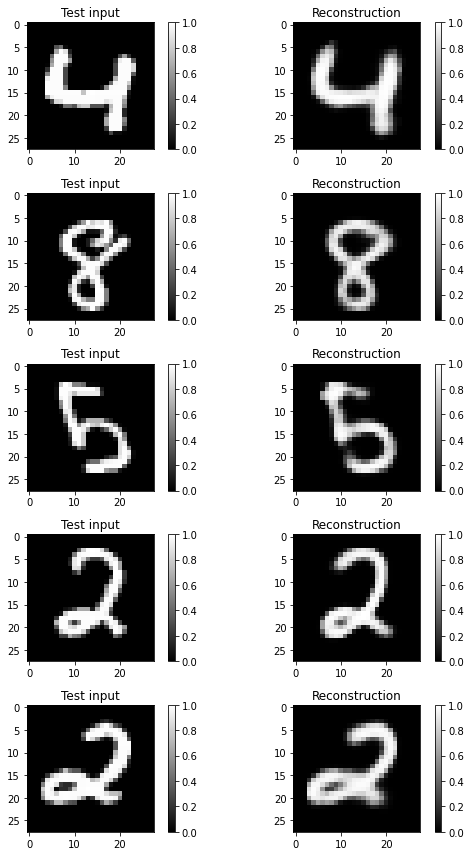

In [0]:
x_sample = mnist.test.next_batch(100)[0]
x_reconstruct = vae.reconstruct(x_sample)

plt.figure(figsize=(8, 12))
for i in range(5):

    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(x_sample[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(x_reconstruct[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
plt.tight_layout()

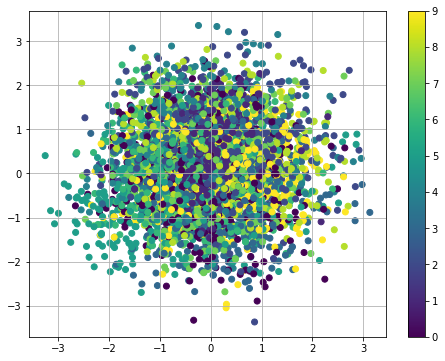

In [0]:
x_sample, y_sample = mnist.test.next_batch(5000)
z_mu = vae.transform(x_sample)
plt.figure(figsize=(8, 6)) 
plt.scatter(z_mu[:, 0], z_mu[:, 1], c=np.argmax(y_sample, 1))
plt.colorbar()
plt.grid()

## 2-D VAE



In [0]:
network_architecture = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=2)  # dimensionality of latent space

vae_2d = train(network_architecture, training_epochs=75)

ERROR! Session/line number was not unique in database. History logging moved to new session 60


/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 cost= 187.800453408
Epoch: 0006 cost= 153.417070313
Epoch: 0011 cost= 147.802381176
Epoch: 0016 cost= 145.402948775
Epoch: 0021 cost= 143.860751565
Epoch: 0026 cost= 142.675373341
Epoch: 0031 cost= 141.823526639
Epoch: 0036 cost= 141.099276692
Epoch: 0041 cost= 140.588658530
Epoch: 0046 cost= 140.111328791
Epoch: 0051 cost= 139.700456168
Epoch: 0056 cost= 139.307293008
Epoch: 0061 cost= 139.025315982
Epoch: 0066 cost= 138.699718961
Epoch: 0071 cost= 138.536931236


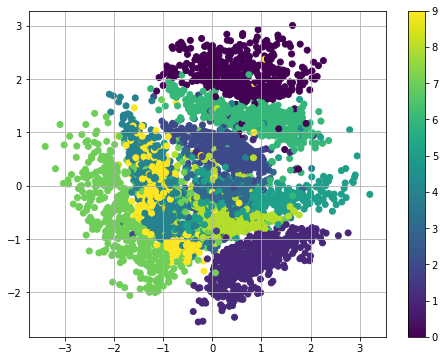

In [0]:
x_sample, y_sample = mnist.test.next_batch(5000)
z_mu = vae_2d.transform(x_sample)
plt.figure(figsize=(8, 6)) 
plt.scatter(z_mu[:, 0], z_mu[:, 1], c=np.argmax(y_sample, 1))
plt.colorbar()
plt.grid()